In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
from hnx.core.hypergraph import Hypergraph
from hnx.generation import random_hypergraph
from hnx.dynamics.contagion import simplicial_contagion

np.random.seed(123)

In [16]:
N = 2000
E2 = N*10
E3 = N*2
hypergraph = random_hypergraph(N, {2 : E2, 3: E3})

In [17]:
beta = 0.002
beta_D = 0.02
mu = 0.05

I_0 = 1*(np.random.random(N)<0.4)
T = 500

rho_t = simplicial_contagion(hypergraph, I_0, T, beta, beta_D, mu)

(0.0, 500.0)

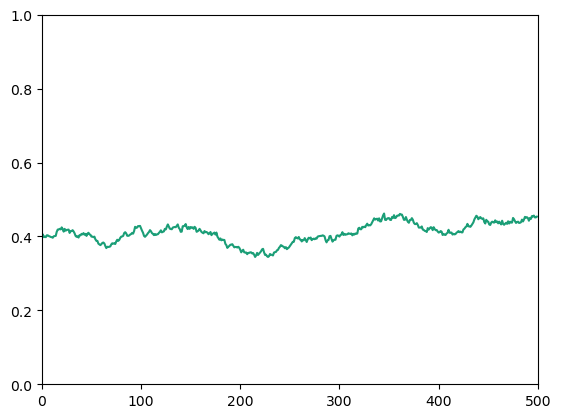

In [18]:
plt.plot(range(T),rho_t,c=plt.cm.Dark2(0)) 
plt.ylim(0,1)
plt.xlim(0,500)